In [2]:
import newsletter
import webbrowser
import os
import datetime

newsletter.create_newsletter("NewsPapers_finance.json")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Wioleta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Starting scraping...
Article `download()` failed with 403 Client Error: Forbidden for url: https://seekingalpha.com/article/4317759-gdx-weekly-minor-price-discovery-lower-early-week-where-sellers-trapped-driving-price-higher?source=feed_all_articles on URL https://seekingalpha.com/article/4317759-gdx-weekly-minor-price-discovery-lower-early-week-where-sellers-trapped-driving-price-higher?source=feed_all_articles
continuing...
Article `download()` failed with 403 Client Error: Forbidden for url: https://seekingalpha.com/article/4317756-irrationally-bullish-and-cherry-on-sundae?source=feed_all_articles on URL https://seekingalpha.com/article/4317756-irrationally-bullish-and-cherry-on-sundae?source=feed_all_articles
continuing...
Article `download()` failed with 403 Client Error: Forbidden for url: https://seekingalpha.com/article/4317748-green-shoots-bond-market-is-ignoring?source=feed_all_articles on URL https://seekingalpha.com/article/4317748-green-shoots-bond-market-is-ignoring?sourc

# -----------------------------------------------------------------------------------------------------------

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Adjusting the style of matplotlib
style.use('ggplot')

In [11]:
#Getting biggest gainers for the day

#!/usr/bin/env python
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):

    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = "https://financialmodelingprep.com/api/v3/stock/gainers"
gainers = get_jsonparsed_data(url)

In [5]:
#and biggest losers

#!/usr/bin/env python
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):

    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/stock/losers")
losers = get_jsonparsed_data(url)

In [15]:
import pandas as pd
losers_df = pd.DataFrame.from_dict(losers["mostLoserStock"])
gainers_df = pd.DataFrame.from_dict(gainers["mostGainerStock"])
losers_df = losers_df.sort_values(by=['changesPercentage'])
gainers_df = gainers_df.sort_values(by=['changesPercentage'])


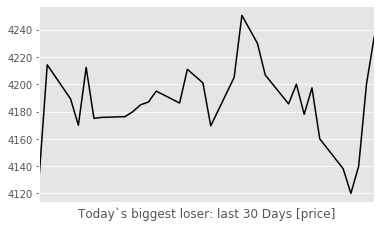

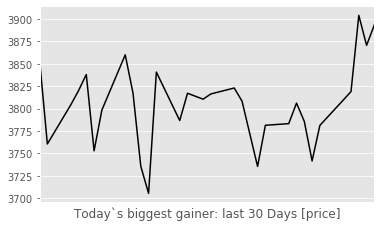

In [34]:
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import date


#remove if added to other code
today = str(date.today())


#names of biggest loser and gainer companies
loser = next(iter(losers.values()))[0].get('ticker')
gainer = next(iter(gainers.values()))[0].get('ticker')

#creates urls to access historical data of respective companies
loser_url = ("https://financialmodelingprep.com/api/v3/historical-price-full/"+ loser +"?timeseries=30")
gainer_url = ("https://financialmodelingprep.com/api/v3/historical-price-full/"+ gainer +"?timeseries=30")
names = ["loser", "gainer"]
c = 0

#creates respective graphs for the close values of the last 30 days of the companies and saves it as png
for i in loser_url, gainer_url:
    response = urlopen(i)
    data = response.read()
    hist = json.loads(data)
    hist.get("historical")
    df = pd.DataFrame(hist.get("historical"))
    df["date"] = pd.to_datetime(df["date"])
    df = df[["date","close"]].copy()
    df.set_index('date', inplace=True)
    df.plot(legend = None, color='black')
    #uncomment next two rows if you dont want axes included in the graph
    #fig = plt.yticks([])
    fig = plt.xticks([])
    fig = plt.xlabel('Today`s biggest ' + names[c] + ': last 30 Days [price]')
    fig = plt.gcf()
    savename = names[c] + "_plot.png"
    fig.savefig(savename, bbox_inches='tight')
    c =+ 1



# ------------------------------------------------------------------------------------------------------------

In [69]:
from flask import render_template
import flask

import datetime
today = datetime.date.today()
datetime = today.strftime('%d, %b %Y')

app = flask.Flask('my app')

if __name__ == "__main__":
    with app.app_context():
        rendered = render_template('Newsletter.html',\
            todaysdate = datetime,\
            source00 = newsletter.rand_source[0],\
            source01 = newsletter.rand_source[1],\
            source02 = newsletter.rand_source[2],\
            source10 = newsletter.rand_source[3],\
            source11 = newsletter.rand_source[4],\
            source12 = newsletter.rand_source[5],\
            link00 = newsletter.rand_link[0],\
            link01 = newsletter.rand_link[1],\
            link02 = newsletter.rand_link[2],\
            link10 = newsletter.rand_link[3],\
            link11 = newsletter.rand_link[4],\
            link12 = newsletter.rand_link[5],\
            pic00 = newsletter.rand_img[0],\
            pic01 = newsletter.rand_img[1],\
            pic02 = newsletter.rand_img[2],\
            pic10 = newsletter.rand_img[3],\
            pic11 = newsletter.rand_img[4],\
            pic12 = newsletter.rand_img[5],\
            title00 = newsletter.rand_title[0],\
            title01 = newsletter.rand_title[1],\
            title02 = newsletter.rand_title[2],\
            title10 = newsletter.rand_title[3],\
            title11 = newsletter.rand_title[4],\
            title12 = newsletter.rand_title[5],\
            text00 = newsletter.rand_text[0],\
            text01 = newsletter.rand_text[1],\
            text02 = newsletter.rand_text[2],\
            text10 = newsletter.rand_text[3],\
            text11 = newsletter.rand_text[4],\
            text12 = newsletter.rand_text[5],\
            gainer1 = gainers_df.ticker[0], \
           gainer2 = gainers_df.ticker[1], \
           gainer3 = gainers_df.ticker[2], \
           gainer4 = gainers_df.ticker[3], \
           gainer5 = gainers_df.ticker[4], \
           gainer6 = gainers_df.ticker[5], \
           gainer7 = gainers_df.ticker[6], \
           gainer8 = gainers_df.ticker[7], \
           gainer9 = gainers_df.ticker[8], \
           gainer10 = gainers_df.ticker[9],\
           ch1 = gainers_df.changes[0], \
           ch2 = gainers_df.changes[1], \
           ch3 = gainers_df.changes[2], \
           ch4 = gainers_df.changes[3], \
           ch5 = gainers_df.changes[4], \
           ch6 = gainers_df.changes[5], \
           ch7 = gainers_df.changes[6], \
           ch8 = gainers_df.changes[7], \
           ch9 = gainers_df.changes[8], \
           ch10 = gainers_df.changes[9], \
           pch1 = gainers_df.changesPercentage[0], \
           pch2 = gainers_df.changesPercentage[1], \
           pch3 = gainers_df.changesPercentage[2], \
           pch4 = gainers_df.changesPercentage[3], \
           pch5 = gainers_df.changesPercentage[4], \
           pch6 = gainers_df.changesPercentage[5], \
           pch7 = gainers_df.changesPercentage[6], \
           pch8 = gainers_df.changesPercentage[7], \
           pch9 = gainers_df.changesPercentage[8], \
           pch10 = gainers_df.changesPercentage[9], \
            pp1 =  gainers_df.price[0] , \
           pp2 =  gainers_df.price[1] , \
           pp3 =  gainers_df.price[2] , \
           pp4 =  gainers_df.price[3] , \
           pp5 =  gainers_df.price[4] , \
           pp6 =  gainers_df.price[5] , \
           pp7 =  gainers_df.price[6] , \
           pp8 =  gainers_df.price[7] , \
           pp9 =  gainers_df.price[8] , \
           pp10 =  gainers_df.price[9] , \
            loser1 = losers_df.ticker[0], \
            loser2 = losers_df.ticker[1], \
            loser3 = losers_df.ticker[2], \
            loser4 = losers_df.ticker[3], \
            loser5 = losers_df.ticker[4], \
            loser6 = losers_df.ticker[5], \
            loser7 = losers_df.ticker[6], \
            loser8 = losers_df.ticker[7], \
            loser9 = losers_df.ticker[8], \
            loser10 = losers_df.ticker[9], \
            chan1 = losers_df.changes[0], \
           chan2 = losers_df.changes[1], \
           chan3 = losers_df.changes[2], \
           chan4 = losers_df.changes[3], \
           chan5 = losers_df.changes[4], \
           chan6 = losers_df.changes[5], \
           chan7 = losers_df.changes[6], \
           chan8 = losers_df.changes[7], \
           chan9 = losers_df.changes[8], \
           chan10 = losers_df.changes[9], \
            pchan1 = losers_df.changesPercentage[0], \
           pchan2 = losers_df.changesPercentage[1], \
           pchan3 = losers_df.changesPercentage[2], \
           pchan4 = losers_df.changesPercentage[3], \
           pchan5 = losers_df.changesPercentage[4], \
           pchan6 = losers_df.changesPercentage[5], \
           pchan7 = losers_df.changesPercentage[6], \
           pchan8 = losers_df.changesPercentage[7], \
           pchan9 = losers_df.changesPercentage[8], \
           pchan10 = losers_df.changesPercentage[9], \
            price1 = losers_df.price[0],\
            price2 = losers_df.price[1],\
            price3 = losers_df.price[2],\
            price4 = losers_df.price[3],\
            price5 = losers_df.price[4],\
            price6 = losers_df.price[5],\
            price7 = losers_df.price[6],\
            price8 = losers_df.price[7],\
            price9 = losers_df.price[8],\
            price10 = losers_df.price[9]

                                  )
        print(rendered)

<!DOCTYPE html>
<html class="" lang="en"><head>
<meta http-equiv="content-type" content="text/html; charset=UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge">
    
    <meta charset="utf-8">
    <meta name="generator" content="Wix.com Website Builder">
 
    
        <meta http-equiv="etag" content="6be4d9bb3ea6f96ef8d41b226664f14e">
    
    
    <meta name="format-detection" content="telephone=no">
    
    

    <meta name="SKYPE_TOOLBAR" content="SKYPE_TOOLBAR_PARSER_COMPATIBLE">

    
        <meta id="wixMobileViewport" name="viewport" content="width=980, user-scalable=yes">
    
   
    
    <style id="viewerMainStyle">
        a,abbr,acronym,address,applet,b,big,blockquote,body,button,caption,center,cite,code,dd,del,dfn,div,dl,dt,em,fieldset,font,footer,form,h1,h2,h3,h4,h5,h6,header,html,i,iframe,img,ins,kbd,label,legend,li,nav,object,ol,p,pre,q,s,samp,section,small,span,strike,strong,sub,sup,table,tbody,td,tfoot,th,thead,title,tr,tt,u,ul,var{margin:0;padding:0;b

In [70]:
f = open('HTML_final.html','w', encoding="utf-8")

message = rendered

f.write(message)
f.close()

#Change path to reflect file location
filename = 'file:///'+os.getcwd()+'/' + 'HTML_final.html'

webbrowser.open_new_tab(filename)

True